In [2]:
import pandas as pd 
import graphviz.backend as be
import numpy as np

In [3]:
df = pd.read_csv(r'D:\Machine Learning\Desicion_tree\Regression_decision_tree\car_price_prediction.csv')

In [4]:
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [5]:
df.select_dtypes(include='object').columns


Index(['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')

In [6]:
condition_map = {
    'Used': 0,
    'Like New': 1,
    'New': 2
}

df['Condition'] = df['Condition'].map(condition_map)


In [7]:
df.head(5)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,2,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,0,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,2,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,2,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,1,73577.10,Mustang


In [8]:
df.shape

(2500, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   int64  
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 195.4+ KB


In [10]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [11]:
df['Brand'].unique()


array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

In [12]:
df['Brand'] = df['Brand'].map({'Toyota':0, 'Ford':1, 'BMW':2, 'Audi':3, 'Honda':4, 'Mercedes':5,'Tesla':6})

In [13]:
df['Fuel Type'].unique()

array(['Petrol', 'Electric', 'Diesel', 'Hybrid'], dtype=object)

In [14]:
df['Fuel Type'] = df['Fuel Type'].map({'Petrol':0, 'Diesel':1, 'Electric':2 , 'Hybrid':3})


In [15]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [16]:
df['Transmission'] = df['Transmission'].map({'Manual':5, 'Automatic':6})

In [17]:
df.describe()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price
count,2500.00000,2500.000000,2500.0000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2.971200,2011.6268,3.465240,1.474400,5.476800,149749.844800,0.981600,52638.022532
std,721.83216,2.000993,6.9917,1.432053,1.111143,0.499561,87919.952034,0.815799,27295.833455
min,1.00000,0.000000,2000.0000,1.000000,0.000000,5.000000,15.000000,0.000000,5011.270000
25%,625.75000,1.000000,2005.0000,2.200000,0.000000,5.000000,71831.500000,0.000000,28908.485000
50%,1250.50000,3.000000,2012.0000,3.400000,1.000000,5.000000,149085.000000,1.000000,53485.240000
75%,1875.25000,5.000000,2018.0000,4.700000,2.000000,6.000000,225990.500000,2.000000,75838.532500
max,2500.00000,6.000000,2023.0000,6.000000,3.000000,6.000000,299967.000000,2.000000,99982.590000


In [18]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,6,2016,2.3,0,5,114832,2,26613.92,Model X
1,2,2,2018,4.4,2,5,143190,0,14679.61,5 Series
2,3,3,2013,4.5,2,5,181601,2,44402.61,A4
3,4,6,2011,4.1,1,6,68682,2,86374.33,Model Y
4,5,1,2009,2.6,1,5,223009,1,73577.10,Mustang


In [19]:
df.corr(numeric_only=True)['Price'].sort_values(ascending=True)


Year           -0.036805
Mileage        -0.008567
Condition      -0.008096
Fuel Type      -0.006640
Engine Size    -0.004420
Transmission    0.001877
Car ID          0.004650
Brand           0.013676
Price           1.000000
Name: Price, dtype: float64

In [20]:
x = df.drop(columns=['Model','Price','Car ID'])

y = df['Price']

In [21]:
x

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition
0,6,2016,2.3,0,5,114832,2
1,2,2018,4.4,2,5,143190,0
2,3,2013,4.5,2,5,181601,2
3,6,2011,4.1,1,6,68682,2
4,1,2009,2.6,1,5,223009,1
...,...,...,...,...,...,...,...
2495,3,2020,2.4,0,6,22650,1
2496,3,2001,5.7,3,5,77701,1
2497,1,2021,1.1,3,5,272827,1
2498,3,2002,4.5,1,5,229164,1


In [22]:
x.isnull().sum()

Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
dtype: int64

In [23]:
y

0       26613.92
1       14679.61
2       44402.61
3       86374.33
4       73577.10
          ...   
2495    61384.10
2496    24710.35
2497    29902.45
2498    46085.67
2499    16594.14
Name: Price, Length: 2500, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(max_depth=3, random_state=42)

In [26]:
reg.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [27]:
x_train

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition
2055,5,2005,3.4,2,6,73401,2
1961,2,2004,1.6,1,5,252234,2
1864,6,2002,5.8,1,5,89882,1
2326,5,2000,4.6,1,5,275333,2
461,4,2010,3.2,1,5,41190,1
...,...,...,...,...,...,...,...
1638,4,2018,4.9,0,5,69072,0
1095,5,2005,2.9,0,5,127521,1
1130,0,2014,3.2,1,5,80636,1
1294,1,2011,4.8,0,5,6336,0


In [28]:
y_train

2055    97600.01
1961     9212.70
1864    89909.81
2326    38235.97
461     77675.22
          ...   
1638    73142.61
1095    82138.86
1130    74003.92
1294    14457.06
860     34382.84
Name: Price, Length: 2000, dtype: float64

## Feature Importance

In [29]:
for importance, feature in zip(reg.feature_importances_, x.columns):
    print(f"{feature}: {importance:.4f}")


Brand: 0.0000
Year: 0.0952
Engine Size: 0.0000
Fuel Type: 0.0000
Transmission: 0.0000
Mileage: 0.9048
Condition: 0.0000


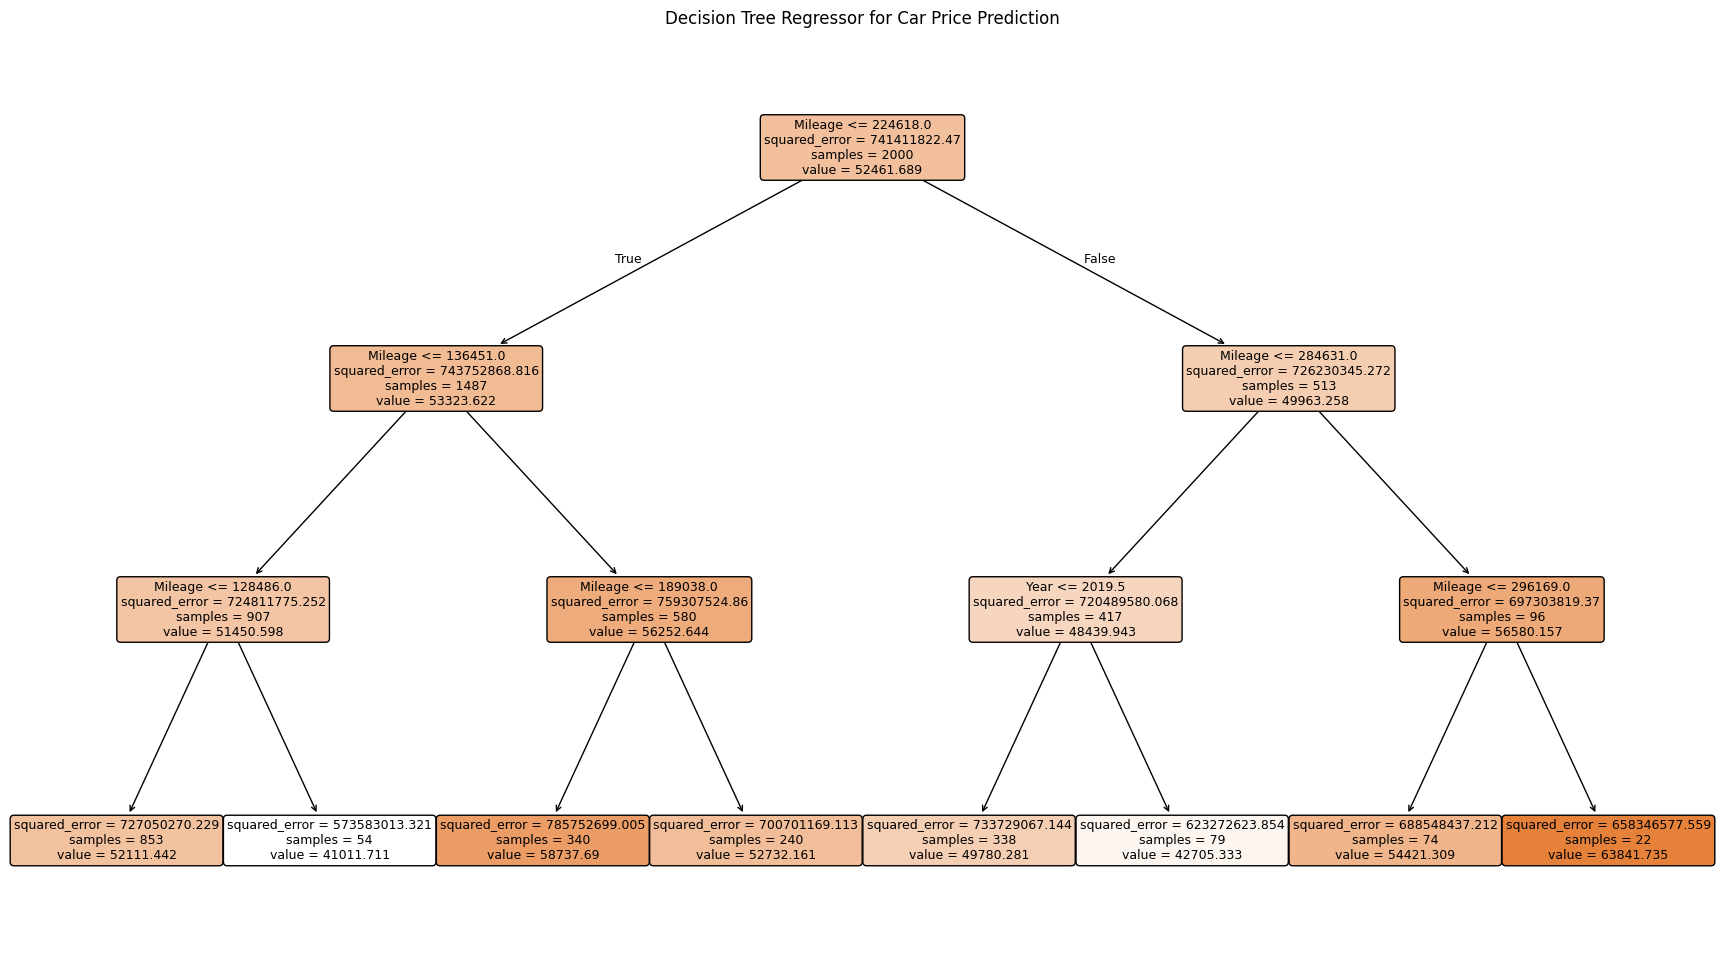

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(
    reg,
    feature_names=x.columns,
    filled=True,
    rounded=True
    )
plt.title("Decision Tree Regressor for Car Price Prediction")
plt.show()


In [31]:
reg.get_depth()


3

In [32]:
x_test

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition
1447,4,2010,3.0,1,5,211864,1
1114,6,2020,4.4,3,5,18781,1
1064,0,2013,4.3,1,5,55547,1
2287,0,2006,3.0,3,6,196914,0
1537,2,2016,5.5,0,6,67764,1
...,...,...,...,...,...,...,...
2375,4,2000,5.8,2,6,136421,1
1609,4,2019,5.8,3,5,299738,1
596,4,2010,3.8,2,6,201264,0
84,5,2018,4.5,0,6,58480,1


In [33]:
y_pred_test = reg.predict(x_test)
y_pred_test

array([52732.16129167, 52111.44219226, 52111.44219226, 52732.16129167,
       52111.44219226, 42705.33329114, 52111.44219226, 52111.44219226,
       49780.28073964, 49780.28073964, 54421.30932432, 52732.16129167,
       58737.69017647, 52111.44219226, 52732.16129167, 52732.16129167,
       52732.16129167, 52111.44219226, 52111.44219226, 52111.44219226,
       58737.69017647, 52732.16129167, 58737.69017647, 52111.44219226,
       54421.30932432, 41011.71148148, 58737.69017647, 58737.69017647,
       49780.28073964, 54421.30932432, 58737.69017647, 54421.30932432,
       49780.28073964, 52732.16129167, 52732.16129167, 52111.44219226,
       52111.44219226, 52111.44219226, 49780.28073964, 52111.44219226,
       58737.69017647, 52111.44219226, 49780.28073964, 52111.44219226,
       52111.44219226, 42705.33329114, 49780.28073964, 52732.16129167,
       52111.44219226, 52111.44219226, 52111.44219226, 58737.69017647,
       58737.69017647, 52111.44219226, 52111.44219226, 42705.33329114,
      

## Overfitting Demonstration (Very Important)

Let’s check training vs test error.

In [34]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y, reg.predict(x))


In [35]:
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:",test_mse)
print(test_mse - train_mse)



Train MSE: 729307126.3321426
Test MSE: 748242166.6360241
18935040.303881526


#### Since training and testing MSE values are close, the model does not show signs of overfitting and generalizes well to unseen data.

## Cost–Complexity Pruning (CART Way)
Step 1: Get α values

In [36]:
path = reg.cost_complexity_pruning_path(x, y)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)


[      0.          834149.7497374  2159475.48950553 2454298.08533421
 2455696.27853221 3012550.35248065]


In [37]:
trees = []

for alpha in ccp_alphas:
    t = DecisionTreeRegressor(ccp_alpha=alpha)
    t.fit(x, y)
    trees.append(t)


## Choose best α (Cross-validation)

In [38]:
errors = [mean_squared_error(y, t.predict(x)) for t in trees]

best_alpha = ccp_alphas[np.argmin(errors)]
print("Best alpha:", best_alpha)


Best alpha: 0.0


Best alpha = 0.0 indicates that the model performs best without regularization, meaning the data does not suffer from overfitting or multicollinearity.

In [39]:
print("Train R2:", reg.score(x_train, y_train))
print("Test R2:", reg.score(x_test, y_test))


Train R2: 0.022711340314690576
Test R2: 0.012291102488877548


In [40]:
x

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition
0,6,2016,2.3,0,5,114832,2
1,2,2018,4.4,2,5,143190,0
2,3,2013,4.5,2,5,181601,2
3,6,2011,4.1,1,6,68682,2
4,1,2009,2.6,1,5,223009,1
...,...,...,...,...,...,...,...
2495,3,2020,2.4,0,6,22650,1
2496,3,2001,5.7,3,5,77701,1
2497,1,2021,1.1,3,5,272827,1
2498,3,2002,4.5,1,5,229164,1


In [41]:
reg.predict([[6,2016,2.3,0,5,114832,2]])

c:\Users\hb292\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([52111.44219226])